In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as nf

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF

from darts import TimeSeries
from darts.models import GaussianProcessFilter
from darts.utils import timeseries_generation as tg
from darts.models import KalmanFilter
from adtk.data import validate_series

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.transformer import RollingAggregate
from adtk.transformer import DoubleRollingAggregate

In [6]:
# !pip install darts


In [11]:
df = pd.read_csv('cleaned_data/原始值-日均价.csv')
df

,date,price
0,2007-02-01,7.250000
1,2007-02-02,7.150000
2,2007-02-03,7.200000
3,2007-02-04,7.100000
4,2007-02-05,7.300000
...,...,...
5382,2021-10-27,8.767186
5383,2021-10-28,9.080190
5384,2021-10-29,9.001968
5385,2021-10-30,9.099980


In [12]:
arry = np.array(df['price']).reshape(-1,1)
arry

array([[7.25      ],
       [7.15      ],
       [7.2       ],
       ...,
       [9.00196753],
       [9.09997964],
       [9.06510577]])

# 高斯滤波去噪【无效】

In [13]:
arry2 = TimeSeries.from_values(arry)
arry2

<TimeSeries (DataArray) (time: 5387, component: 1, sample: 1)>
array([[[7.25      ]],

       [[7.15      ]],

       [[7.2       ]],

       ...,

       [[9.00196753]],

       [[9.09997964]],

       [[9.06510577]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 ... 5380 5381 5382 5383 5384 5385 5386
  * component  (component) <U1 '0'
Dimensions without coordinates: sample

c:\users\administrator\anaconda3\envs\science\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


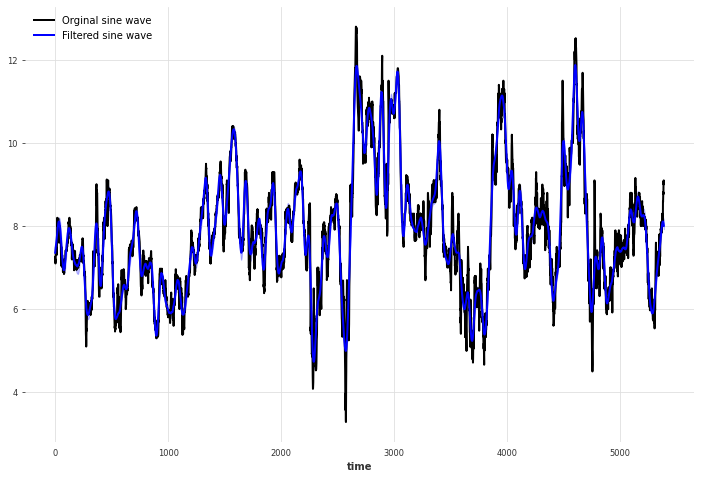

In [35]:
# 过滤噪声
filtered_x = gpf.filter(arry2,num_samples=10)

plt.figure(figsize=[12, 8])
arry2.plot(color="black", label="Orginal sine wave")
filtered_x.plot(color="blue", label="Filtered sine wave")
plt.legend()

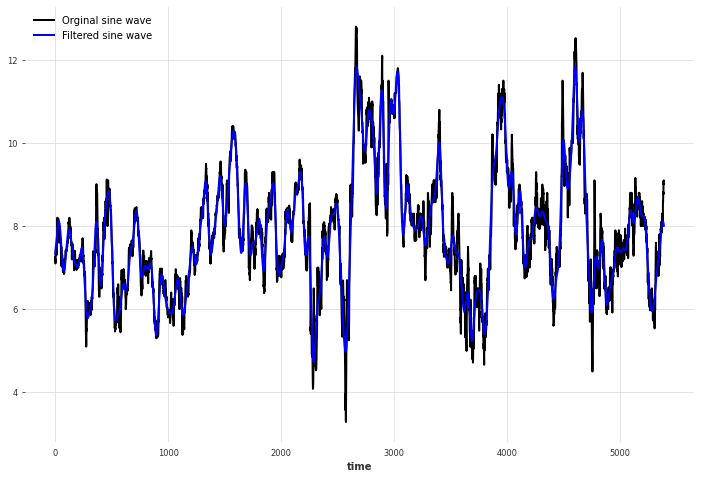

In [34]:
plt.figure(figsize=[12, 8])
arry2.plot(color="black", label="Orginal sine wave")
filtered_x.plot(color="blue", label="Filtered sine wave")
plt.legend()

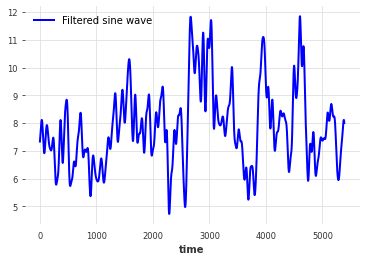

In [16]:
filtered_x.plot(color="blue", label="Filtered sine wave")

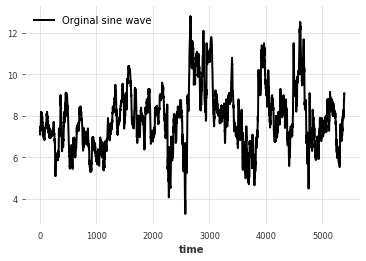

In [17]:
arry2.plot(color="black", label="Orginal sine wave")

In [21]:
arry2[:30]

<TimeSeries (DataArray) (time: 30, component: 1, sample: 1)>
array([[[7.25      ]],

       [[7.15      ]],

       [[7.2       ]],

       [[7.1       ]],

       [[7.3       ]],

       [[7.3       ]],

       [[7.3       ]],

       [[7.5       ]],

       [[7.5       ]],

       [[7.47876943]],

...

       [[8.15      ]],

       [[8.1       ]],

       [[8.        ]],

       [[8.06058968]],

       [[8.        ]],

       [[8.        ]],

       [[8.        ]],

       [[8.11916313]],

       [[8.17895919]],

       [[7.71094679]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 21 22 23 24 25 26 27 28 29
  * component  (component) <U1 '0'
Dimensions without coordinates: sample

In [20]:
filtered_x[:30]

<TimeSeries (DataArray) (time: 30, component: 1, sample: 1)>
array([[[7.3360065 ]],

       [[7.35947677]],

       [[7.38369575]],

       [[7.40868931]],

       [[7.4344697 ]],

       [[7.46103487]],

       [[7.48836799]],

       [[7.5164371 ]],

       [[7.54519492]],

       [[7.57457895]],

...

       [[7.90744733]],

       [[7.93470323]],

       [[7.96070364]],

       [[7.98526613]],

       [[8.00821119]],

       [[8.02936398]],

       [[8.04855617]],

       [[8.06562767]],

       [[8.08042827]],

       [[8.09281923]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 21 22 23 24 25 26 27 28 29
  * component  (component) <U1 '0'
Dimensions without coordinates: sample

# 卡尔曼滤波【鸡肉价格中无法使用】

In [25]:
arry3 = TimeSeries.from_values(arry)
arry3

<TimeSeries (DataArray) (time: 5387, component: 1, sample: 1)>
array([[[7.25      ]],

       [[7.15      ]],

       [[7.2       ]],

       ...,

       [[9.00196753]],

       [[9.09997964]],

       [[9.06510577]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 ... 5380 5381 5382 5383 5384 5385 5386
  * component  (component) <U1 '0'
Dimensions without coordinates: sample

In [30]:
kf = KalmanFilter(dim_x=1)
kf.fit(arry3)

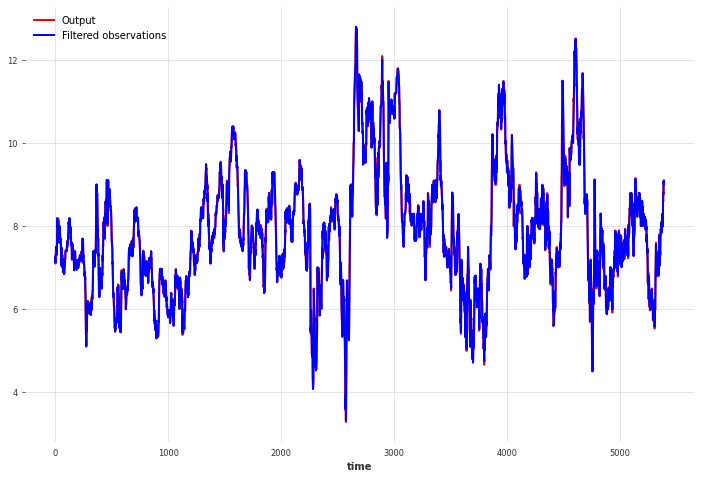

In [33]:
# y_filtered是经过噪声过滤处理的
y_filtered = kf.filter(arry3)

plt.figure(figsize=[12, 8])
arry3.plot(color="red", label="Output")
#y_filtered
y_filtered.plot(color="blue", label="Filtered observations")
plt.legend()

# adtk异常检测
检测器是扫描时间序列并返回异常时间点的组件。

In [49]:
df = pd.read_csv('cleaned_data/原始值-日均价.csv')
df.head()

,date,price
0,2007-02-01,7.25
1,2007-02-02,7.15
2,2007-02-03,7.20
3,2007-02-04,7.10
4,2007-02-05,7.30


In [53]:
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.transformer import RollingAggregate
from adtk.transformer import DoubleRollingAggregate

,price
date,
2007-02-01,7.25
2007-02-02,7.15
2007-02-03,7.20


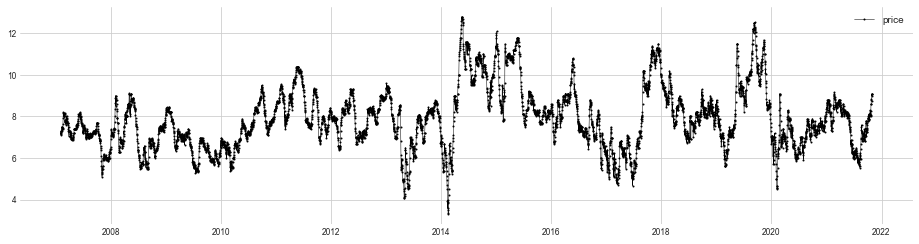

In [56]:
df = pd.read_csv('cleaned_data/原始值-日均价.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df = validate_series(df)
plot(df)
df.head(3)

## 检验是否服从正太分布

In [55]:
from scipy.stats import kstest

# 正态分布检验
def KsNormDetect(df):
    # 计算均值
    u = df['price'].mean()
    # 计算标准差
    std = df['price'].std()
    # 计算P值
    res=kstest(df, 'norm', (u, std))[1]
    # 判断p值是否服从正态分布，p<=0.05 则服从正态分布，否则不服从。
    if res<=0.05:
        print('该列数据服从正态分布------------')
        print('均值为：%.3f，标准差为：%.3f' % (u, std))
        print('------------------------------')
        return 1
    else:
        return 0
ks_res = KsNormDetect(df)

该列数据服从正态分布------------
均值为：7.889，标准差为：1.477
------------------------------


## 阈值AD
adtk.detector.ThresholdAD(low=None, high=None)

参数：
* low：下限，小于此值，视为异常
* high：上限，大于此值，视为异常
* 原理：通过认为设定上下限来识别异常
* 总结：固定阈值算法


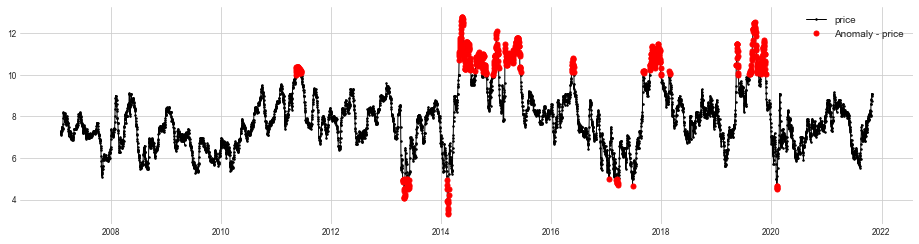

In [103]:
from adtk.detector import ThresholdAD
threshold_ad = ThresholdAD(high=10, low=5)
anomalies = threshold_ad.detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

## 分位数AD
QuantileAD 将每个时间序列值与历史分位数进行比较。

adtk.detector.QuantileAD(low=None, high=None)

参数：
* low：分位下限，范围(0,1)，当low=0.25时，表示Q1
* high：分位上限，范围(0,1)，当low=0.25时，表示Q3
* 原理：通过历史数据计算出给定low与high对应的分位值Q_low,Q_high，小于Q_low或大于Q_high，视为异常
* 总结：分位阈值算法


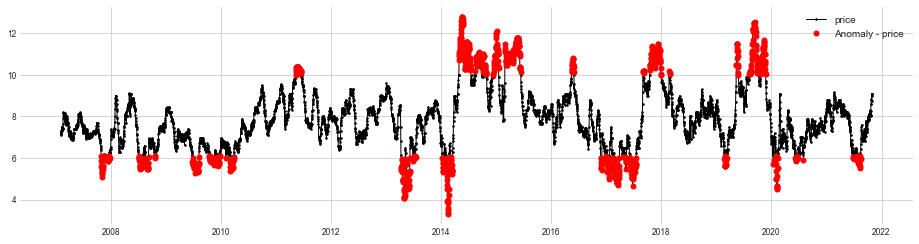

In [104]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.9, low=0.1)
anomalies = quantile_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

## 四分位数范围AD
InterQuartileRangeAD另一个广泛使用的基于简单历史统计的检测器是基于四分位距 (IQR)。当值超出定义的范围时[Q1−c×IQR, Q3+c×IQR] 在哪里 IQR=Q3−Q1是 25% 和 75% 分位数之间的差异。在只有一小部分甚至没有训练数据异常的情况下，此检测器通常优于 QuantileAD。

adtk.detector.InterQuartileRangeAD(c=3.0)

参数：
* c：分位距的系数，用来确定上下限，可为float，也可为(float,float)
* 原理：
* 当c为float时，通过历史数据计算出 Q3+cIQR 作为上限值，大于上限值视为异常
* 当c=(float1,float2)时，通过历史数据计算出 (Q1-c1IQR, Q3+c2*IQR) 作为正常范围，不在正常范围视为异常
* 总结：箱线图算法

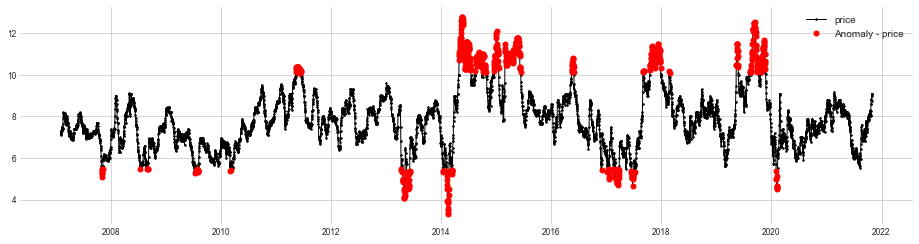

In [111]:
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=0.8)
anomalies = iqr_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

## 广义ESDTestAD（GeneralizedESDTestAD）
请注意，广义 ESD 测试的一个关键假设是正态值服从近似正态分布。请仅在此假设成立时使用此检测器。

adtk.detector.GeneralizedESDTestAD(alpha=0.05)

参数：
* alpha：显著性水平 (Significance level)，alpha越小，表示识别出的异常约有把握是真异常
* 原理:将样本点的值与样本的均值作差后除以样本标准差，取最大值，通过t分布计算阈值，对比阈值确定异常点

计算步骤简述：
   * 设置显著水平alpha，通常取0.05
   * 指定离群比例h，若h=5%，则表示50各样本中存在离群点数为2
   * 计算数据集的均值mu与标准差sigma，将所有样本与均值作差，取绝对值，再除以标准差，找出最大值，得到esd_1
   * 在剩下的样本点中，重复步骤3，可以得到h个esd值
   * 为每个esd值计算critical value: lambda_i (采用t分布计算)
   * 统计每个esd是否大于lambda_i，大于的认为你是异常


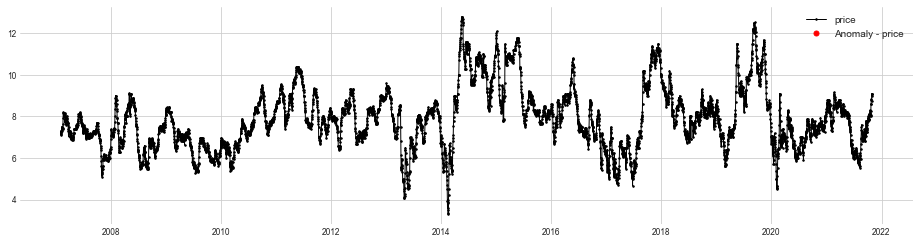

In [61]:
from adtk.detector import GeneralizedESDTestAD
esd_ad = GeneralizedESDTestAD(alpha=0.1)
anomalies = esd_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

## PersistAD
PersistAD将每个时间序列值与其先前的值进行比较。在内部，它被实现为带有转换器DoubleRollingAggregate的管道网络。

adtk.detector.PersistAD(window=1, c=3.0, side=‘both’, min_periods=None, agg=‘median’)

参数：
* window：参考窗长度，可为int, str
* c：分位距倍数，用于确定上下限范围
* side：检测范围，为’positive’时检测突增，为’negative’时检测突降，为’both’时突增突降都检测
* min_periods：参考窗中最小个数，小于此个数将会报异常，默认为None，表示每个时间点都得有值
* agg：参考窗中的统计量计算方式，因为当前值是与参考窗中产生的统计量作比较，所以得将参考窗中的数据计算成统计量，默认’median’，表示去参考窗的中位值

原理：
* 用滑动窗口遍历历史数据，将窗口后的一位数据与参考窗中的统计量做差，得到一个新的时间序列s1;
* 计算s1的(Q1-cIQR, Q3+cIQR) 作为正常范围；
* 若当前值与它参考窗中的统计量之差，不在2中的正常范围内，视为异常。

调参：
* window：越大，模型越不敏感，不容易被突刺干扰
* c：越大，对于波动大的数据，正常范围放大较大，对于波动较小的数据，正常范围放大较小
* min_periods：对缺失值的容忍程度，越大，越不允许有太多的缺失值
* agg：统计量的聚合方式，跟统计量的特性有关，如 'median’不容易受极端值影响

总结：先计算一条新的时间序列，再用箱线图作异常检测

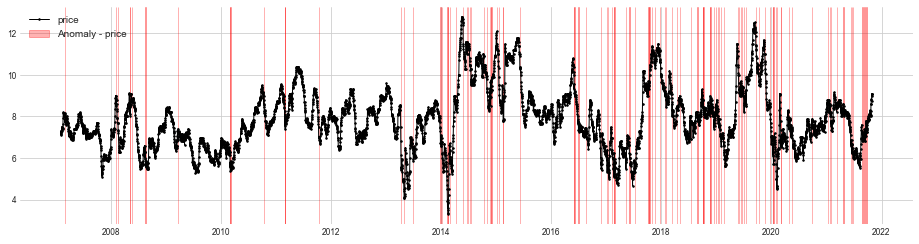

In [63]:
from adtk.detector import PersistAD



#捕捉短期异常
# persist_ad = PersistAD(c=3.0, side='positive')
persist_ad = PersistAD(c=1.5, side='negative')
anomalies = persist_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');

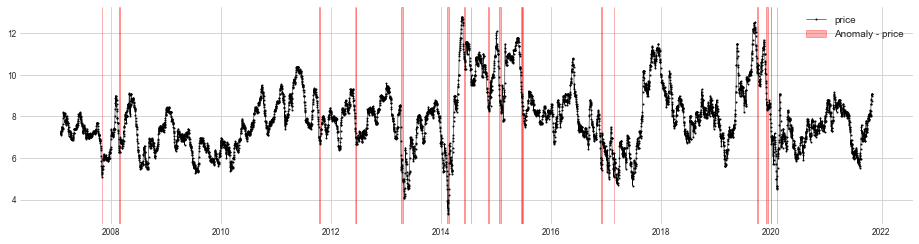

In [67]:
# 捕捉长期异常: 修改窗口长度


persist_ad = PersistAD(c=1.5, side='negative',window=24)
# persist_ad.window = 24
anomalies = persist_ad.fit_detect(df)
plot(df, anomaly=anomalies, anomaly_color='red');

## 水平移位AD（LevelShiftAD）
LevelShiftAD通过跟踪彼此相邻的两个滑动时间窗口的中值之间的差异来检测值水平的变化。它对瞬时尖峰不敏感，如果经常发生嘈杂的异常值，它可能是一个不错的选择。在内部，它被实现为带有转换器DoubleRollingAggregate的管道网络。

adtk.detector.LevelShiftAD(window, c=6.0, side=‘both’, min_periods=None)

参数：
* window：支持(10,5)，表示使用两个相邻的滑动窗，左侧的窗中的中位值表示参考值，右侧窗中的中位值表示当前值
* c：越大，对于波动大的数据，正常范围放大较大，对于波动较小的数据，正常范围放大较小，默认6.0
* side：检测范围，为’positive’时检测突增，为’negative’时检测突降，为’both’时突增突降都检测
* min_periods：参考窗中最小个数，小于此个数将会报异常，默认为None，表示每个时间点都得有值

原理：
该模型用于检测突变情况，相比于PersistAD，其抗抖动能力较强，不容易出现误报

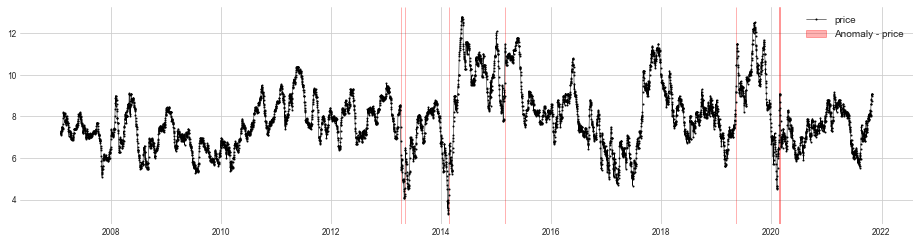

In [69]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=6.0, side='both', window=5)
anomalies = level_shift_ad.fit_detect(df)
plot(df, anomaly=anomalies, anomaly_color='red');

## VolatilityShiftAD
VolatilityShiftAD通过跟踪彼此相邻的两个滑动时间窗口的标准偏差之间的差异来检测波动率水平的变化。在内部，它被实现为带有转换器DoubleRollingAggregate的管道网络。

c：用于根据历史数据确定正常范围界限的因子
四分位范围。默认值:6.0。

In [9]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=6.0, side='positive', window=30)
anomalies = volatility_shift_ad.fit_detect(df)
plot(df, anomaly=anomalies, anomaly_color='red');

NameError: name 'df' is not defined

## 季节性AD(SeasonalAD)

SeasonalAD检测异常违反季节性模式。在内部，它被实现为带有转换器 ClassicSeasonalDecomposition的管道网络。

adtk.detector.SeasonalAD(freq=None, side=‘both’, c=3.0, trend=False)

SeasonalAD主要是根据ClassicSeasonalDecomposition来处理，判断。

参数：
* freq：季节性周期
* c：越大，对于波动大的数据，正常范围放大较大，对于波动较小的数据，正常范围放大较小，默认6.0
* side：检测范围，为’positive’时检测突增，为’negative’时检测突降，为’both’时突增突降都检测
* trend： 是否考虑趋势

C:\Users\chenruhai\AppData\Local\Temp\ipykernel_17396\3820527868.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('notebooks/data/seasonal.csv', index_col="Time", parse_dates=True, squeeze=True)


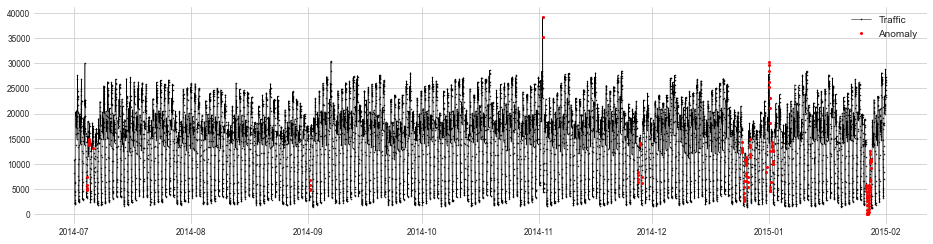

In [8]:
from adtk.detector import SeasonalAD
s = pd.read_csv('notebooks/data/seasonal.csv', index_col="Time", parse_dates=True, squeeze=True)
s = validate_series(s)

seasonal_ad = SeasonalAD(c=5.0, side="both")
anomalies = seasonal_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

## 自回归AD
AutoregressionAD检测时间序列中自回归行为的异常变化。在内部，它被实现为带有转换器Retrospect和RegressionResidual的管道网络。

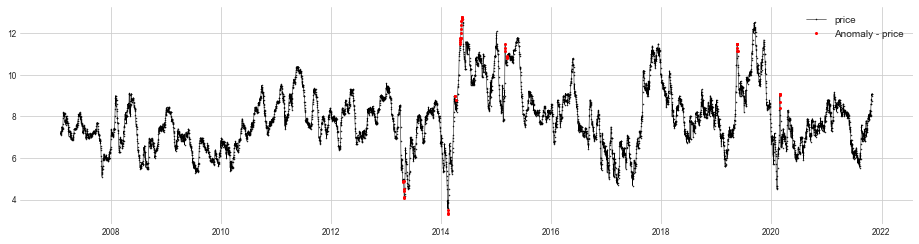

In [78]:
from adtk.detector import AutoregressionAD
autoregression_ad = AutoregressionAD(n_steps=7*2, step_size=24, c=3.0)
anomalies = autoregression_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

## 最小集群检测器
MinClusterDetector将多元时间序列视为高维空间中的独立点，将它们划分为集群，并将最小集群中的值标识为异常。这可能有助于捕获高维空间中的异常值。

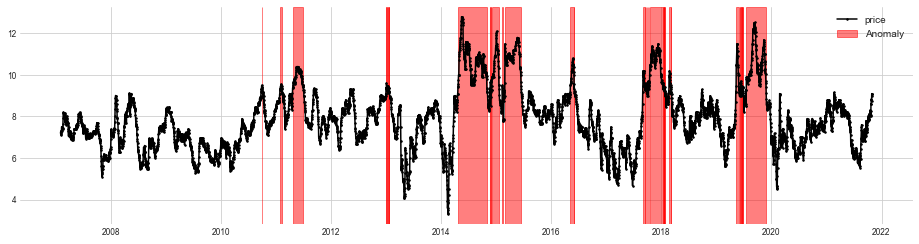

In [91]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=3))
anomalies = min_cluster_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1.5, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.5, curve_group='all');

##  离群点检测器【多变量】

OutlierDetector执行多变量与时间无关的异常值检测并将异常值识别为异常。多元异常值检测算法可以是 scikit-learn 或其他遵循相同 API 的包中的算法。使用OutlierDetectorscikit-learn 局部异常值因子模型。

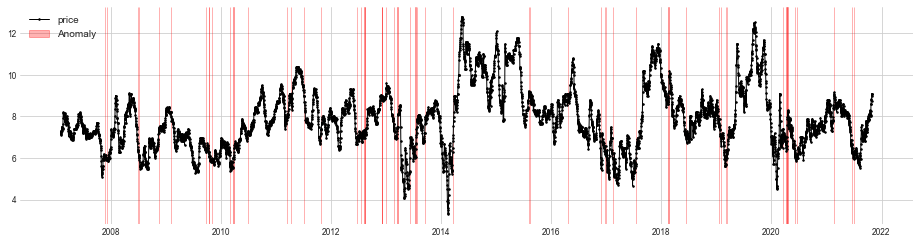

In [95]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.01))
anomalies = outlier_detector.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

## 回归AD【多变量】
RegressionAD通过跟踪回归误差检测多元序列之间通常关系的异常违反。在内部，它被实现为带有变压器RegressionResidual的管道网络。

In [98]:
# from adtk.detector import RegressionAD
# from sklearn.linear_model import LinearRegression
# regression_ad = RegressionAD(regressor=LinearRegression(), target="Speed (kRPM)", c=3.0)
# anomalies = regression_ad.fit_detect(df)
# plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

## PcaAD【多变量】

PcaAD对多变量时间序列（每个时间点作为高维空间中的一个向量）执行主成分分析 (PCA) 并跟踪这些向量的重构误差。当正常点应该位于较低等级的流形上而异常点不是时，此检测器可能会有所帮助。在内部，它被实现为带有转换器 PcaReconstructionError的管道。

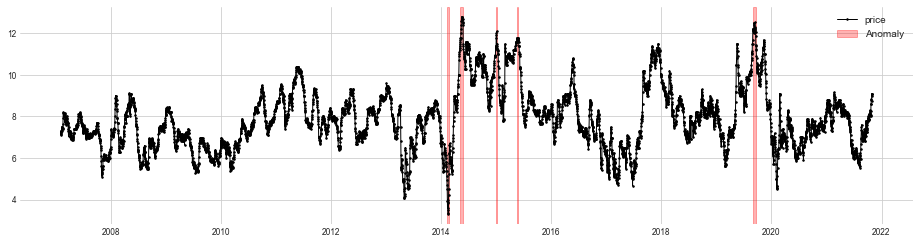

In [101]:
from adtk.detector import PcaAD
pca_ad = PcaAD(k=0)
anomalies = pca_ad.fit_detect(df)
plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

# adtk特征工程：转换器transformer
转换器是转换时间序列以便提取有用信息的组件。它也可以解释为特征工程组件。

## RollingAggregate
RollingAggregate沿时间序列滚动滑动窗口并使用选定的操作进行聚合。常见的例子包括移动平均线、滚动标准差等。

[<AxesSubplot:>]

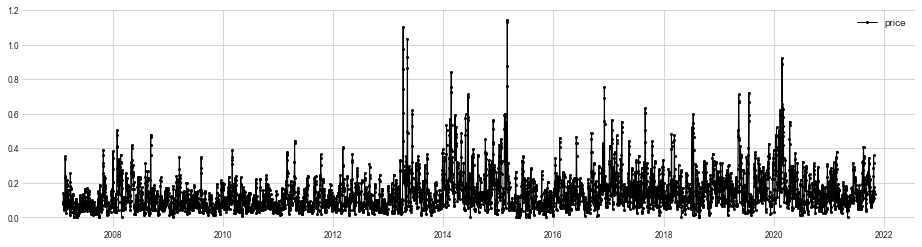

In [115]:
from adtk.transformer import RollingAggregate
s_transformed = RollingAggregate(agg='std', window=5).transform(df)
plot(s_transformed, ts_linewidth=1, ts_markersize=4)

In [121]:
s_transformed[s_transformed['price']>0.5]

,price
date,
2008-01-30,0.506951
2013-04-08,0.743850
2013-04-09,0.977092
2013-04-10,1.103870
2013-04-11,0.858707
...,...
2020-03-03,0.528391
2020-03-04,0.579083
2020-03-05,0.628346


## DoubleRollingAggregate[滚动两(多)个窗口]
DoubleRollingAggregate沿时间序列并排滚动两个滑动窗口，使用选定的操作进行聚合，并跟踪两个窗口之间聚合指标的差异。这可能有助于跟踪时间序列中统计行为的变化。

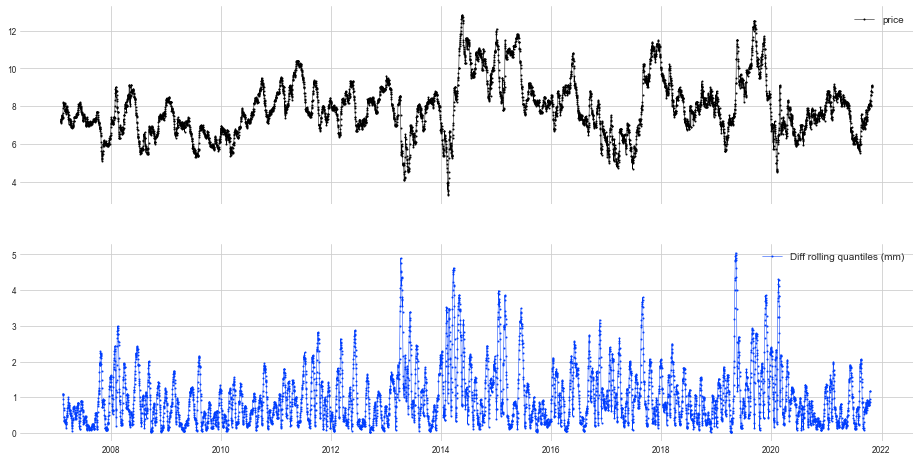

In [152]:
from adtk.transformer import DoubleRollingAggregate
s_transformed = DoubleRollingAggregate(
    agg="quantile",
    agg_params={"q": [0.1, 0.5, 0.9]},
    window=15,
    diff="l2").transform(df)
# print(s_transformed.head(20))
s_transformed.columns=["Diff rolling quantiles (mm)"]
plot(pd.concat([df, s_transformed], axis=1));

In [151]:
pd.concat([df, s_transformed],axis=1).head(17)

,price,Diff rolling quantiles (mm)
date,,
2007-02-01,7.250000,NaN
2007-02-02,7.150000,NaN
2007-02-03,7.200000,NaN
2007-02-04,7.100000,NaN
2007-02-05,7.300000,NaN
2007-02-06,7.300000,NaN
2007-02-07,7.300000,NaN
2007-02-08,7.500000,NaN
2007-02-09,7.500000,NaN


## 经典季节分解（ClassicSeasonalDecomposition）
https://adtk.readthedocs.io/en/stable/notebooks/demo.html#ClassicSeasonalDecomposition

ClassicSeasonalDecomposition将系列分解为趋势部分（可选）、季节性部分和剩余部分。残差部分可能有助于识别季节性模式的异常偏差。

In [154]:
# from adtk.transformer import ClassicSeasonalDecomposition
# s_transformed = ClassicSeasonalDecomposition().fit_transform(df)
# s_transformed.columns=["Seasonal decomposition residual"]
# plot(pd.concat([df, s_transformed], axis=1), ts_markersize=1);

## Retrospect（回顾）

Retrospect返回具有追溯值的数据帧，即时间 t 的行包括 (tk)'s 处的值，其中 k's 由用户指定。这种变压器对于应考虑滞后效应的情况可能很有用。

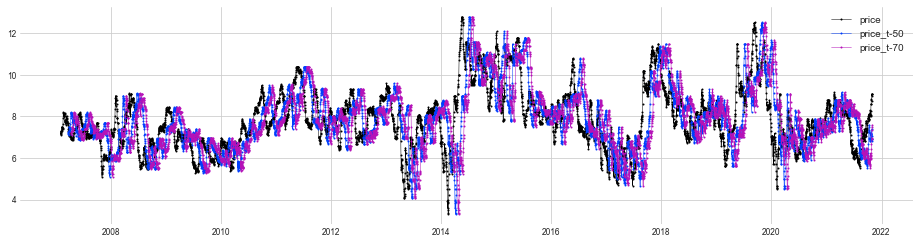

In [156]:
from adtk.transformer import Retrospect
df_r = Retrospect(n_steps=2, step_size=20, till=50).transform(df)
plot(pd.concat([df, df_r], axis=1), curve_group="all");

## 回归残差【多变量】
RegressionResidual对多元序列执行回归并返回回归残差。这可能有助于识别系列之间通常关系的异常违反。

In [160]:
from adtk.transformer import RegressionResidual
s = RegressionResidual(regressor=LinearRegression(), target="Speed (kRPM)").fit_transform(df)
s.columns = ['Regression residual (kRPM)']
plot(pd.concat([df, s], axis=1), ts_linewidth=1, ts_markersize=3, curve_group=[("Speed (kRPM)", "Power (kW)"), "Regression residual (kRPM)"]);

## Pca投影【多变量】
PcaProjection 将多元序列转换为具有前 k 个主成分的表示。

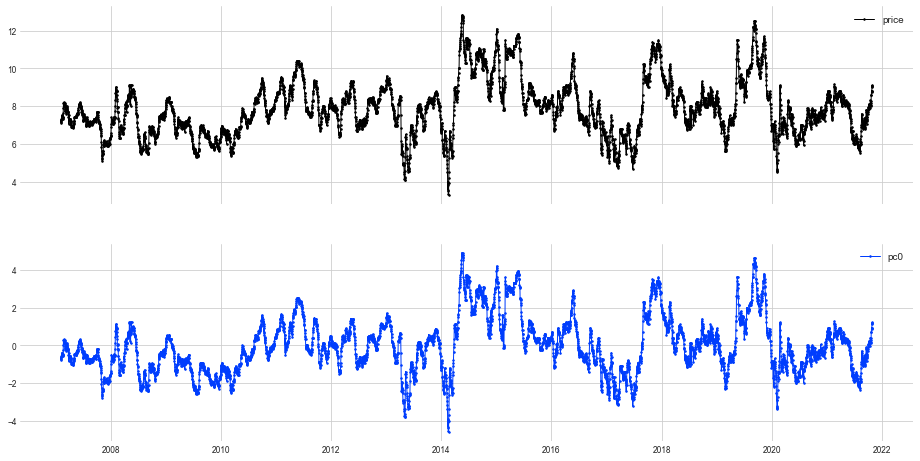

In [162]:
from adtk.transformer import PcaProjection
s = PcaProjection(k=1).fit_transform(df)
plot(pd.concat([df, s], axis=1), ts_linewidth=1, ts_markersize=3, curve_group=[('price'), "pc0"]);

## PCa重建【多变量】
PcaReconstruction 将一个多元序列投影到由其前 k 个主成分跨越的超平面上。

In [ ]:
from adtk.transformer import PcaReconstruction
df_transformed = PcaReconstruction(k=1).fit_transform(df).rename(columns={"Speed (kRPM)": "Speed reconstruction (kRPM)", "Power (kW)": "Power reconstruction (kW)"})
plot(pd.concat([df, df_transformed], axis=1), ts_linewidth=1, ts_markersize=3, curve_group=[("Speed (kRPM)", "Power (kW)"), ("Speed reconstruction (kRPM)", "Power reconstruction (kW)")]);

## PcaReconstructionError
PcaReconstructionError 将多元序列投影到由其前 k 个主成分跨越的超平面上，并返回指示数据点与前 k 个主成分的低秩子空间之间距离的误差。

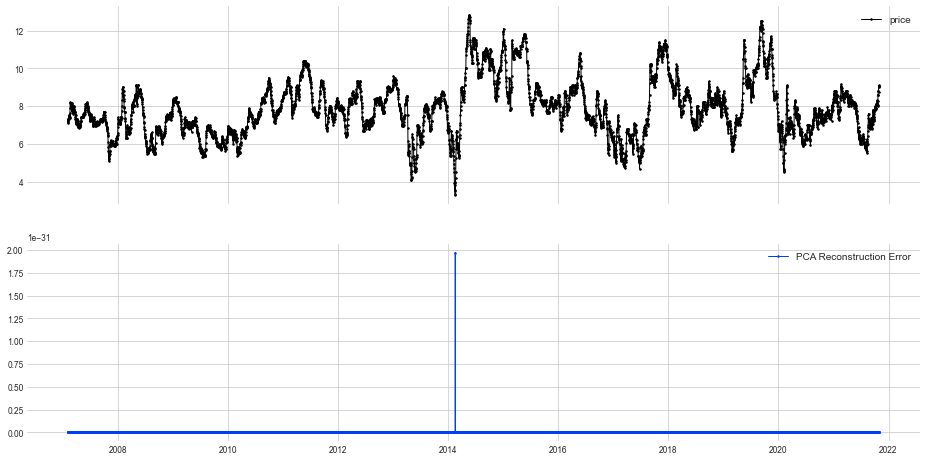

In [165]:
from adtk.transformer import PcaReconstructionError
s = PcaReconstructionError(k=1).fit_transform(df).rename("PCA Reconstruction Error")
plot(pd.concat([df, s], axis=1), ts_linewidth=1, ts_markersize=3, curve_group=[("price"), "PCA Reconstruction Error"]);

# 聚合器（Aggregator ）

Aggregator 是一个组合不同检测结果（异常列表）的组件。它是一个集成组件。它们都包含在模块中adtk.aggregator。

## Or聚合器
OrAggregator 将时间点标识为异常，只要它包含在输入异常列表之一中。

In [ ]:

from adtk.aggregator import OrAggregator

## and聚合器

In [ ]:
from adtk.aggregator import AndAggregator

# Pipe
Pipeline 依次连接变压器和检测器。https://adtk.readthedocs.io/en/stable/notebooks/demo.html#Pipeline

## pipeline

In [167]:
# 将ClassicSeasonalDecomposition变压器与QuantileAD检测器连接起来，旨在检测时间序列中与常规季节性模式的异常偏差。
from adtk.pipe import Pipeline
steps = [
    ("deseasonal", ClassicSeasonalDecomposition()),
    ("quantile_ad", QuantileAD(high=0.995, low=0.005))
]
pipeline = Pipeline(steps)
s = validate_series(df)
anomalies = pipeline.fit_detect(s)
plot(df, anomaly=anomalies, ts_markersize=1, anomaly_markersize=2, anomaly_tag="marker", anomaly_color='red');

In [ ]:
# return_intermediate在调用对象的拟合或预测方法时，用户可以选择通过将参数设置为 True 来获取中间序列和异常列表Pipeline。
results = pipeline.fit_detect(s, return_intermediate=True)
plot(results["deseasonal"], ts_markersize=1);



## pipenet
Pipenet是Pipeline对模型组件的非顺序组合的推广。检测器模块中的一些检测器在内部由Pipenet.

例如，单边电平移位检测器（LevelShiftAD参数side为“正”或“负”）实现如下Pipenet。一个DoubleRollingAggregate参数diff为“l1”的变压器连接一个InterQuartileRangeAD检测器，检测两侧的电平变化，另一个DoubleRollingAggregate参数diff为“diff”的变压器连接一个ThresholdAD参数upper_thresh为0的检测器，检测正增加的电平变化。然后AndAggregator通过选择正的电平位移来获得正的电平位移。

In [169]:
from adtk.pipe import Pipenet
from adtk.aggregator import AndAggregator

steps = {
    "abs_level_change": {
        "model": DoubleRollingAggregate(
            agg="median",
            window=10,
            center=True,
            diff="l1"
        ),
        "input": "original"
    },
    "level_shift": {
        "model": InterQuartileRangeAD(c=3.0),
        "input": "abs_level_change"
    },
    "level_change": {
        "model": DoubleRollingAggregate(
            agg="median",
            window=10,
            center=True,
            diff="diff"
        ),
        "input": "original",
    },
    "positive_level_change": {
        "model": ThresholdAD(high=0),
        "input": "level_change"
    },
    "positive_level_shift": {
        "model": AndAggregator(),
        "input": ["level_shift", "positive_level_change"]
    }
}
pipenet = Pipenet(steps)

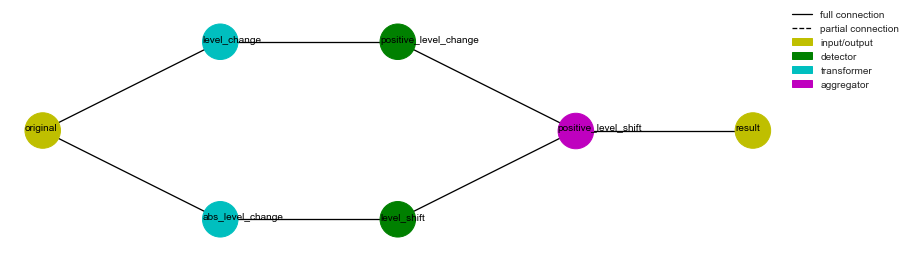

In [170]:
# 一个对象的流程图Pipenet可以通过方法来可视化plot_flowchart。

pipenet.plot_flowchart();

In [171]:
# 方法summary，get_params可用于获取管道对象的信息。
print(pipenet.summary())
print(pipenet.get_params())


name                   model                   input                                     subset
---------------------  ----------------------  ----------------------------------------  --------
abs_level_change       DoubleRollingAggregate  original                                  all
level_change           DoubleRollingAggregate  original                                  all
level_shift            InterQuartileRangeAD    abs_level_change                          all
positive_level_change  ThresholdAD             level_change                              all
positive_level_shift   AndAggregator           ['level_shift', 'positive_level_change']  all
None
{'abs_level_change': {'window': 10, 'agg': 'median', 'agg_params': None, 'center': True, 'min_periods': None}, 'level_shift': {'c': 3.0}, 'level_change': {'window': 10, 'agg': 'median', 'agg_params': None, 'center': True, 'min_periods': None}, 'positive_level_change': {'low': None, 'high': 0}, 'positive_level_shift': {}}


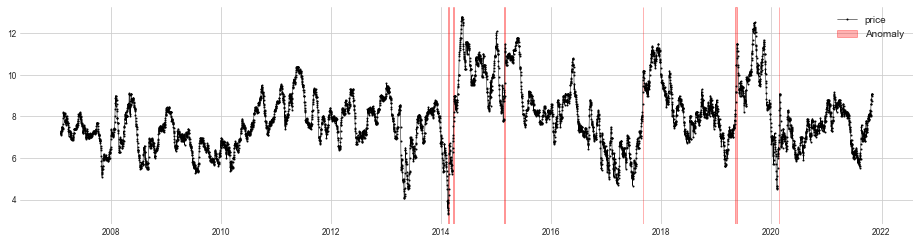

In [172]:
anomalies = pipenet.fit_detect(df)
plot(df, anomaly=anomalies, anomaly_color='red');

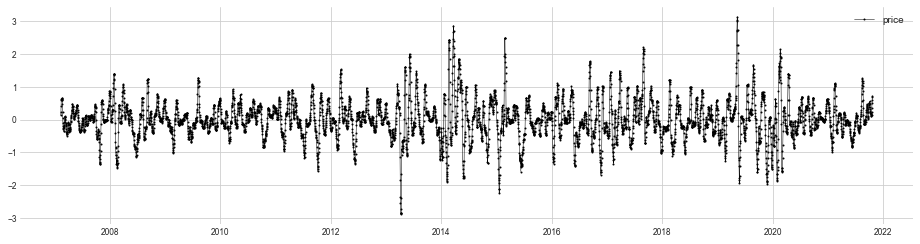

In [173]:
# 与 Pipeline类似，在调用对象的拟合或预测方法时，用户可以通过return_intermediatePipenet将参数设置为 True 来获取中间序列和异常列表。

results = pipenet.fit_detect(s, return_intermediate=True)
plot(results["level_change"]);

# 指标
模块metrics包含四种类型的评分函数，用于根据真实异常测量检测结果的质量。

所有的评分函数都支持两种模式： 

* 1. 如果输入是二进制标签的形式，每个正时间点都被认为是一个独立的异常事件。这等效于时间无关二元分类的评分函数的定义。

* 2.如果输入是事件列表的形式，则每个异常时间段都被视为一个事件。评分函数的计算将基于检测到的列表和真实列表中出现的段长度。

## recall
recall，又名灵敏度、命中率或真阳性率 (TPR)，是成功检测到的真异常的百分比。

### 二进制标签
1.在以下示例中，有 13 个数据点是已知异常。检测结果中，13个中有9个检测成功。因此，召回分数等于 9/13。

0.6923076923076923

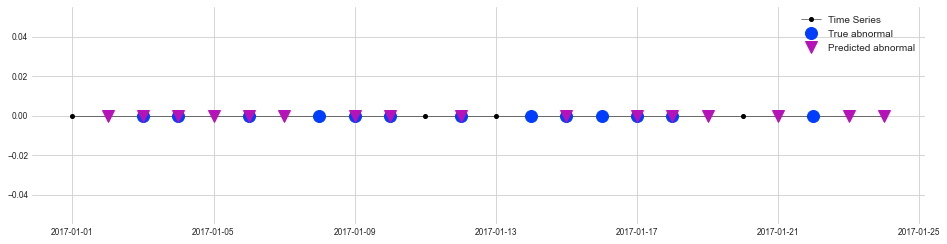

In [177]:


s_constant = pd.Series(0, pd.date_range(start='2017-1-1', periods=24, freq="1d"), name="Time Series")

label_true = pd.Series(
    [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0],
    pd.date_range(start='2017-1-1', periods=24, freq="1d"),
)
label_pred = pd.Series(
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1],
    pd.date_range(start='2017-1-1', periods=24, freq="1d"),
)


plot(s_constant, ts_markersize=8,
     anomaly={"True abnormal": label_true, "Predicted abnormal": label_pred},
     anomaly_tag="marker",
     anomaly_markersize=12,
     anomaly_marker={"True abnormal": "o", "Predicted abnormal": "v"});


from adtk.metrics import recall
recall(label_true, label_pred)

### 事件列表
2.在以下示例中，有 6 个异常事件（包括 3 个瞬时事件）。默认情况下，如果检测结果中包含不少于 50% 的段，则认为事件检测成功。在本例中，根据此设置检测前 4 个事件，未检测到后 2 个事件。因此，召回分数等于 4/6。

0.6666666666666666

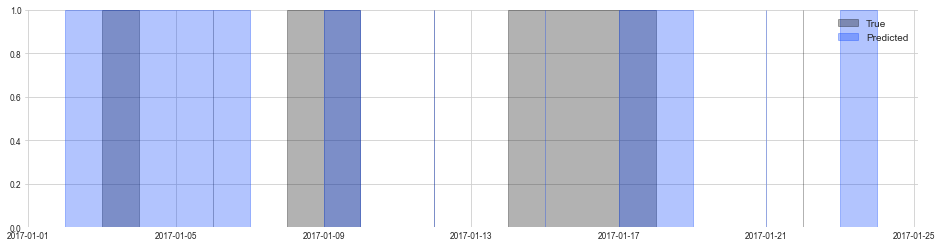

In [179]:
list_true = [
    (pd.Timestamp("2017-01-03 00:00:00"), pd.Timestamp("2017-01-03 23:59:59.999999999")),
    pd.Timestamp("2017-01-06 00:00:00"),
    (pd.Timestamp("2017-01-08 00:00:00"), pd.Timestamp("2017-01-09 23:59:59.999999999")),
    pd.Timestamp("2017-01-12 00:00:00"),
    (pd.Timestamp("2017-01-14 00:00:00"), pd.Timestamp("2017-01-17 23:59:59.999999999")),
    pd.Timestamp("2017-01-22 00:00:00"),
]
list_pred = [
    (pd.Timestamp("2017-01-02 00:00:00"), pd.Timestamp("2017-01-06 23:59:59.999999999")),
    (pd.Timestamp("2017-01-09 00:00:00"), pd.Timestamp("2017-01-09 23:59:59.999999999")),
    pd.Timestamp("2017-01-12 00:00:00"),
    pd.Timestamp("2017-01-15 00:00:00"),
    (pd.Timestamp("2017-01-17 00:00:00"), pd.Timestamp("2017-01-18 23:59:59.999999999")),
    pd.Timestamp("2017-01-21 00:00:00"),
    (pd.Timestamp("2017-01-23 00:00:00"), pd.Timestamp("2017-01-23 23:59:59.999999999")),
]
plot(anomaly={"True": list_true, "Predicted": list_pred},);

recall(list_true, list_pred)

## precision
评分函数precision类似于recall，不同之处在于它计算预测异常为真实异常的百分比。在某些情况下，它也称为阳性预测值 (PPV)。

## f1_score
如果检测器过于宽容，recall分数会很高，而分数会precision很低。如果检测器太严格，recall分数会很低，而分数会recall很高。f1_score 是这两者之间的折衷，其中返回了召回率和精度的调和均值。

## IoU得分
Intersect over union (IoU) 得分iou计算了两个列表中被识别为异常的时间段与两个列表中至少一个列表中识别为异常的时间段之间的长度比。

In [180]:
# 示例，真正异常段与检测到的段之间的并集为 13 天，而相交为 3 天。因此 IoU 得分为 3/13。

list_true = [
    (pd.Timestamp("2017-01-03 00:00:00"), pd.Timestamp("2017-01-03 23:59:59.999999999")),
    pd.Timestamp("2017-01-06 00:00:00"),
    (pd.Timestamp("2017-01-08 00:00:00"), pd.Timestamp("2017-01-09 23:59:59.999999999")),
    pd.Timestamp("2017-01-12 00:00:00"),
    (pd.Timestamp("2017-01-14 00:00:00"), pd.Timestamp("2017-01-17 23:59:59.999999999")),
    pd.Timestamp("2017-01-22 00:00:00"),
]
list_pred = [
    (pd.Timestamp("2017-01-02 00:00:00"), pd.Timestamp("2017-01-06 23:59:59.999999999")),
    (pd.Timestamp("2017-01-09 00:00:00"), pd.Timestamp("2017-01-09 23:59:59.999999999")),
    pd.Timestamp("2017-01-12 00:00:00"),
    pd.Timestamp("2017-01-15 00:00:00"),
    (pd.Timestamp("2017-01-17 00:00:00"), pd.Timestamp("2017-01-18 23:59:59.999999999")),
    pd.Timestamp("2017-01-21 00:00:00"),
    (pd.Timestamp("2017-01-23 00:00:00"), pd.Timestamp("2017-01-23 23:59:59.999999999")),
]

from adtk.metrics import iou
iou(list_true, list_pred)

0.2307692307673817

# 数据处理

## 验证时间序列
功能validate_series检查一些常见的关键问题，如果对时间序列执行异常检测而不修复它们，可能会导致问题。该功能会自动修复其中一些，而在检测到其他时会引发错误。

将检查并自动修复的问题包括：
* 时间指数不是单调递增的；
* 时间索引包含重复的时间戳（通过保留第一个值来修复）；
* （可选）时间索引属性freq缺失；
* （可选）时间序列包括分类（非二进制）标签列（通过将分类标签转换为二进制指标来修复）。


In [181]:
df = pd.read_csv('cleaned_data/原始值-日均价.csv')
df.head()

,date,price
0,2007-02-01,7.25
1,2007-02-02,7.15
2,2007-02-03,7.20
3,2007-02-04,7.10
4,2007-02-05,7.30


In [ ]:
from adtk.data import validate_series
# 该函数可以自动将分类序列转换为二进制序列。
validate_series(df, check_categorical=True)

## 验证事件列表
函数validate_events检查事件列表（时间窗口列表）的有效性。常见问题包括无效的时间窗口、重叠或连续的时间窗口、未排序的事件等。

In [182]:
event_list = [
    (pd.Timestamp('2017-1-2 23:59:59.999999999'), pd.Timestamp('2017-1-1 00:00:00.000000000')),
    (pd.Timestamp('2017-1-2 00:00:00.000000000'), pd.Timestamp('2017-1-3 23:59:59.999999999')),
    (pd.Timestamp('2017-1-8 00:00:00.000000000'), pd.Timestamp('2017-1-9 23:59:59.999999999')),
    pd.Timestamp('2017-1-5 00:00:00.000000000'),
    (pd.Timestamp('2017-1-9 00:00:00.000000000'), pd.Timestamp('2017-1-10 23:59:59.999999999')),
    (pd.Timestamp('2017-1-4 00:00:00.000000000'), pd.Timestamp('2017-1-5 23:59:59.999999999')),
    pd.Timestamp('2017-1-7 00:00:00.000000000')
]
event_list

[(Timestamp('2017-01-02 23:59:59.999999999'),
  Timestamp('2017-01-01 00:00:00')),
 (Timestamp('2017-01-02 00:00:00'),
  Timestamp('2017-01-03 23:59:59.999999999')),
 (Timestamp('2017-01-08 00:00:00'),
  Timestamp('2017-01-09 23:59:59.999999999')),
 Timestamp('2017-01-05 00:00:00'),
 (Timestamp('2017-01-09 00:00:00'),
  Timestamp('2017-01-10 23:59:59.999999999')),
 (Timestamp('2017-01-04 00:00:00'),
  Timestamp('2017-01-05 23:59:59.999999999')),
 Timestamp('2017-01-07 00:00:00')]

In [183]:
from adtk.data import validate_events
validated_event_list = validate_events(event_list)
validated_event_list

[(Timestamp('2017-01-02 00:00:00'),
  Timestamp('2017-01-05 23:59:59.999999999')),
 Timestamp('2017-01-07 00:00:00'),
 (Timestamp('2017-01-08 00:00:00'),
  Timestamp('2017-01-10 23:59:59.999999999'))]

## 将二进制系列转换为事件列表
函数to_events将二进制序列转换为事件列表。

In [185]:
s = pd.Series([True, False, False, True, True, True, False, False, True, False],
              index=pd.date_range(start='2017-1-1', periods=10, freq='D'))
s

2017-01-01     True
2017-01-02    False
2017-01-03    False
2017-01-04     True
2017-01-05     True
2017-01-06     True
2017-01-07    False
2017-01-08    False
2017-01-09     True
2017-01-10    False
Freq: D, dtype: bool

In [186]:
from adtk.data import to_events
to_events(s)

[(Timestamp('2017-01-01 00:00:00', freq='D'),
  Timestamp('2017-01-01 23:59:59.999999999', freq='D')),
 (Timestamp('2017-01-04 00:00:00', freq='D'),
  Timestamp('2017-01-06 23:59:59.999999999', freq='D')),
 (Timestamp('2017-01-09 00:00:00', freq='D'),
  Timestamp('2017-01-09 23:59:59.999999999', freq='D'))]

对于有规律频率的序列，默认假设序列中的每个时间项代表一个周期，而不是一个瞬时时间点。freq_as_period用户可以通过设置为 False来关闭此选项。

In [187]:
to_events(s, freq_as_period=False)

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-09 00:00:00')]

当时间点被视为瞬时瞬间时，该函数默认不会合并“连续”点，因为“连续”是连续时间线上的概念。通过设置merge_consecutive为 True，用户可以强制函数返回“连续”时间窗口，其中时间索引中彼此相邻的正时间点被合并到同一事件中。用户应注意此类时间窗口的含义。

In [188]:
to_events(s, freq_as_period=False, merge_consecutive=True)

[Timestamp('2017-01-01 00:00:00', freq='D'),
 (Timestamp('2017-01-04 00:00:00', freq='D'),
  Timestamp('2017-01-06 00:00:00', freq='D')),
 Timestamp('2017-01-09 00:00:00', freq='D')]

## 将事件列表转换为二进制系列
函数to_labels将事件列表转换为遵循给定时间索引的二进制序列。

与 类似to_events，参数freq_as_period控制时间索引中具有规则频率的元素是表示周期还是时刻。如果是一个周期，只要一个事件与其重叠，该周期就被标记为正数。否则，如果事件覆盖了某个时刻，则将其标记为正。

In [189]:
time_index = pd.date_range(start='2017-1-1', periods=5, freq='D')
time_index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')

In [190]:
event_list = [(pd.Timestamp('2017-1-2 18:30:00'), pd.Timestamp('2017-1-3 02:00:00')),
              (pd.Timestamp('2017-1-4 20:00:00'), pd.Timestamp('2017-1-5 09:30:00'))]

In [191]:
from adtk.data import to_labels
to_labels(event_list, time_index, freq_as_period=True)

2017-01-01    False
2017-01-02     True
2017-01-03     True
2017-01-04     True
2017-01-05     True
Freq: D, dtype: bool

In [192]:
to_labels(event_list, time_index, freq_as_period=False)

2017-01-01    False
2017-01-02    False
2017-01-03     True
2017-01-04    False
2017-01-05     True
Freq: D, dtype: bool

## 活动期间展开
在计算检测结果的质量时，有时轻微的偏移是可以接受的。函数expand_events通过给定因子扩展列表中事件的持续时间，使得评分更宽容。

In [194]:
true_anomaly_list = [
    pd.Timestamp('2017-1-2 18:00:00'),
    pd.Timestamp('2017-1-4 20:00:00')]

detected_anomaly_list = [
    pd.Timestamp('2017-1-2 18:02:00'),
    pd.Timestamp('2017-1-4 19:57:00')]
from adtk.metrics import precision
precision(true_anomaly_list, detected_anomaly_list)

0.0

In [195]:
from adtk.data import expand_events
expanded_true_anomaly_list = expand_events(
    true_anomaly_list, left_expand='5min', right_expand='5min')
expanded_true_anomaly_list

[(Timestamp('2017-01-02 17:55:00'), Timestamp('2017-01-02 18:05:00')),
 (Timestamp('2017-01-04 19:55:00'), Timestamp('2017-01-04 20:05:00'))]

In [196]:
precision(expanded_true_anomaly_list, detected_anomaly_list)

1.0

## 将时间序列拆分为训练和测试段
在构建时间序列异常检测模型时，将历史序列拆分为训练和测试段是需要的常见操作。

函数split_train_test提供了四种拆分模式。用户可以根据具体情况进行选择。

* 将时间序列分成 n_splits 个等长的折叠，根据 train_ratio 将每个折叠分成训练和测试。
* 创建 n_splits 折叠，其中每个折叠从 t_0 开始并在 t_(n/n_splits) 结束，其中 n 从 0 到 n_splits，折叠的第一个 train_ratio 用于训练。
* 创建 n_splits 折叠，其中每个折叠从 t_0 开始。每个折叠最后都有 len(ts)/(1 + n_splits) 个测试点。每个折叠的长度为 n * len(ts)/(1 + n_splits)，其中 n 的范围从 1 到 n_splits。
* 创建 n_splits 折叠，其中每个折叠从 t_0 开始。每个折叠在时间序列的开头都有 n * len(ts)/(1 + n_splits) 个训练点，其中 n 的范围从 1 到 n_splits，其余点是测试点。

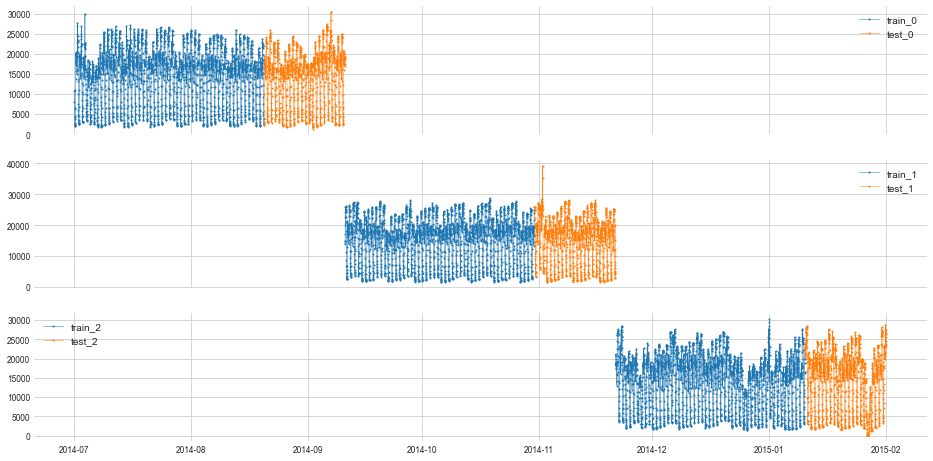

In [199]:

s = pd.read_csv('notebooks/data/seasonal.csv', index_col="Time", parse_dates=True, squeeze=True)

from adtk.data import split_train_test
splits = split_train_test(s, mode=1, n_splits=3)
df = pd.DataFrame(index=s.index)
for i, (train, test) in enumerate(splits):
    df["train_{}".format(i)] = train
    df["test_{}".format(i)] = test


plot(df,
     curve_group=[("train_{}".format(i), "test_{}".format(i)) for i in range(3)],
     ts_color={**{"train_{}".format(i): "tab:blue" for i in range(3)}, **{"test_{}".format(i): "tab:orange" for i in range(3)}},
     figsize=(16, 8));

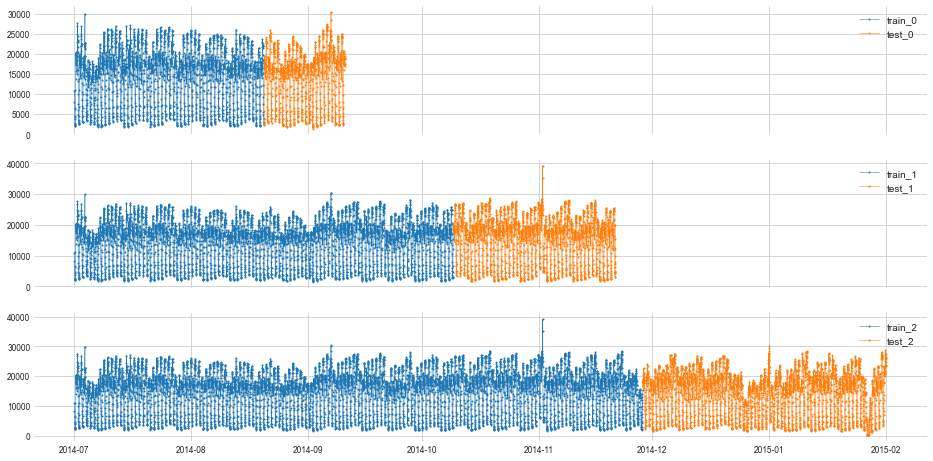

In [207]:
splits = split_train_test(s, mode=2, n_splits=3)
df = pd.DataFrame(index=s.index)
for i, (train, test) in enumerate(splits):
    df["train_{}".format(i)] = train
    df["test_{}".format(i)] = test
plot(df,
     curve_group=[("train_{}".format(i), "test_{}".format(i)) for i in range(3)],
     ts_color={**{"train_{}".format(i): "tab:blue" for i in range(3)}, **{"test_{}".format(i): "tab:orange" for i in range(3)}},
     figsize=(16, 8));

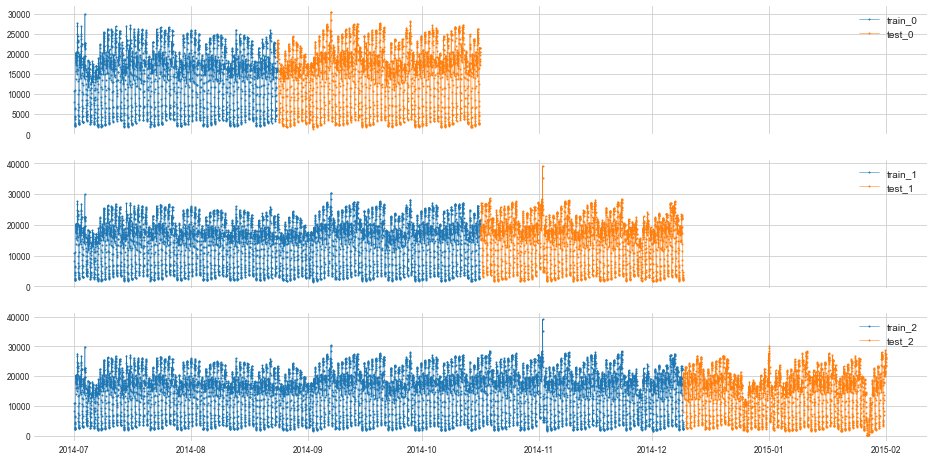

In [208]:

splits = split_train_test(s, mode=3, n_splits=3)
df = pd.DataFrame(index=s.index)
for i, (train, test) in enumerate(splits):
    df["train_{}".format(i)] = train
    df["test_{}".format(i)] = test
plot(df,
     curve_group=[("train_{}".format(i), "test_{}".format(i)) for i in range(3)],
     ts_color={**{"train_{}".format(i): "tab:blue" for i in range(3)}, **{"test_{}".format(i): "tab:orange" for i in range(3)}},
     figsize=(16, 8));

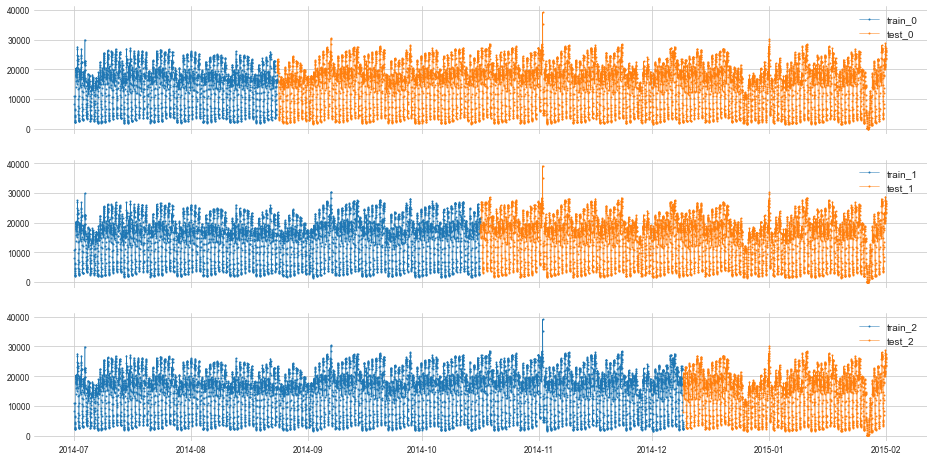

In [209]:
splits = split_train_test(s, mode=4, n_splits=3)
df = pd.DataFrame(index=s.index)
for i, (train, test) in enumerate(splits):
    df["train_{}".format(i)] = train
    df["test_{}".format(i)] = test
plot(df,
     curve_group=[("train_{}".format(i), "test_{}".format(i)) for i in range(3)],
     ts_color={**{"train_{}".format(i): "tab:blue" for i in range(3)}, **{"test_{}".format(i): "tab:orange" for i in range(3)}},
     figsize=(16, 8));